In [1]:
#https://www.tensorflow.org/get_started/mnist/beginners

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# TensorFlow Graph visualizer code
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))



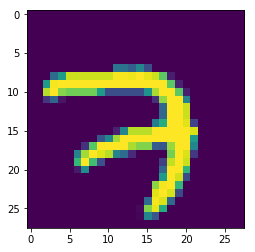

In [5]:
plt.imshow(np.reshape(mnist.train.images[0],(28,28)))
plt.show()

In [6]:
x = tf.placeholder(tf.float32, [None, 784])

In [7]:
with tf.device('/gpu:0'):
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))

In [8]:
#y = tf.nn.softmax(tf.matmul(x, W) + b)
with tf.device('/gpu:0'):
    y = tf.nn.softmax(tf.tanh(tf.matmul(x, W) + b))

In [9]:
#True classes
with tf.device('/gpu:0'):
    y_ = tf.placeholder(tf.float32, [None, 10])

In [10]:
#cross_entropy
with tf.device('/gpu:0'):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [11]:
with tf.device('/gpu:0'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [12]:
#Session executing model
#workarounds for GPU memory in jupyter notebook
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
config = tf.ConfigProto(log_device_placement=True, gpu_options=gpu_options)
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)
tf.global_variables_initializer().run()

In [13]:
accs = []
for _ in range(100):
    batch_xs, batch_ys = mnist.train.next_batch(30000)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    #cp = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    #acc = tf.reduce_mean(tf.cast(cp, tf.float32))
    #accs.append(acc)

In [14]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.8684


In [15]:
plot(accs)

NameError: name 'plot' is not defined

In [16]:
#Session executing model
#workarounds for GPU memory in jupyter notebook
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
config = tf.ConfigProto(log_device_placement=True, gpu_options=gpu_options)
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)
tf.global_variables_initializer().run()

In [34]:
hidden_size = 784 * 5
g = tf.Graph()
#with g.as_default():
with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, [None, 10])

    W1 = tf.Variable(tf.zeros([784, hidden_size]))
    W2 = tf.Variable(tf.zeros([hidden_size, 10]))
    b1 = tf.Variable(tf.zeros([hidden_size]))
    b2 = tf.Variable(tf.zeros([10]))

    hid = (tf.tanh(tf.matmul(x, W1) + b1))
    y = (tf.tanh(tf.matmul(hid, W2) + b2))

    #W1 = tf.Variable(tf.zeros([784, 10]))
    #y = tf.nn.softmax(tf.tanh(tf.matmul(x, W1) + b2))

    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
    #err = (y_ - y)**2
    #train_step = tf.train.GradientDescentOptimizer(0.1).minimize(err)
tf.global_variables_initializer().run()

In [ ]:
accs = []
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(30000)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [ ]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

In [ ]:
0.9017

In [19]:
show_graph(g)